In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2345/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1459, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-11-13,1510.900024,1522.099976,1506.800049,1515.000000,7196443
2025-11-14,1518.900024,1520.900024,1505.500000,1505.500000,7682823
2025-11-17,1518.300049,1523.699951,1511.500000,1520.900024,5871416
2025-11-18,1519.400024,1527.800049,1510.500000,1521.699951,11045042
2025-11-19,1518.900024,1522.300049,1512.000000,1517.400024,5692366


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 6693


,date,title,source
0,"Wed, 15 Jan 2020 08:00:00 GMT","Telecom, retail may boost Reliance’s earnings ...","{'href': 'https://www.livemint.com', 'title': ..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
3,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

done



## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.5.2-pyhd8ed1ab_0 
  nltk               conda-forge/noar

openssl-3.6.0        | 3.0 MB    |                                       |   0% 
nltk-3.9.2           | 1.1 MB    |                                       |   0% 

regex-2025.11.3      | 402 KB    |                                       |   0% 


joblib-1.5.2         | 219 KB    |                                       |   0% 



certifi-2025.11.12   | 153 KB    |                                       |   0% 




ca-certificates-2025 | 149 KB    |                                       |   0% 





certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 

regex-2025.11.3      | 402 KB    | #4                                    |   4% 


openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 
nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 





certifi-2025.11.12   | 153 KB    | ##################################### | 100% 


joblib-1.5.2         | 219 KB    | ##################################### | 100% 



certifi-2025.11.12   | 153 KB    | ##################################### | 100% 

regex-2025.11.3      | 402 KB    | ##################################### | 100% 






ca-certificates-2025 | 149 KB    | ###9                                  |  11% 

regex-2025.11.3      | 402 KB    | ##################################### | 100% 




ca-certificates-2025 | 149 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | #########################2            |  68% 
nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 






openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 




joblib-1.5.2         | 219 KB    | ##################################### | 100% 


joblib-1.5.2         | 219 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 
nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                





Preparing transaction: - 

done
Verifying transaction: | 

/ 

done
Executing transaction: \ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...


[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,"Telecom, retail may boost Reliance’s earnings ...",telecom retail may boost reliance earnings q l...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
3,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-11-20 14:39:34.916481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/20/2025 02:39:37 PM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


11/20/2025 02:39:37 PM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/6693 headlines...


  Processed 128/6693 headlines...


  Processed 192/6693 headlines...


  Processed 256/6693 headlines...


  Processed 320/6693 headlines...


  Processed 384/6693 headlines...


  Processed 448/6693 headlines...


  Processed 512/6693 headlines...


  Processed 576/6693 headlines...


  Processed 640/6693 headlines...


  Processed 704/6693 headlines...


  Processed 768/6693 headlines...


  Processed 832/6693 headlines...


  Processed 896/6693 headlines...


  Processed 960/6693 headlines...


  Processed 1024/6693 headlines...


  Processed 1088/6693 headlines...


  Processed 1152/6693 headlines...


  Processed 1216/6693 headlines...


  Processed 1280/6693 headlines...


  Processed 1344/6693 headlines...


  Processed 1408/6693 headlines...


  Processed 1472/6693 headlines...


  Processed 1536/6693 headlines...


  Processed 1600/6693 headlines...


  Processed 1664/6693 headlines...


  Processed 1728/6693 headlines...


  Processed 1792/6693 headlines...


  Processed 1856/6693 headlines...


  Processed 1920/6693 headlines...


  Processed 1984/6693 headlines...


  Processed 2048/6693 headlines...


  Processed 2112/6693 headlines...


  Processed 2176/6693 headlines...


  Processed 2240/6693 headlines...


  Processed 2304/6693 headlines...


  Processed 2368/6693 headlines...


  Processed 2432/6693 headlines...


  Processed 2496/6693 headlines...


  Processed 2560/6693 headlines...


  Processed 2624/6693 headlines...


  Processed 2688/6693 headlines...


  Processed 2752/6693 headlines...


  Processed 2816/6693 headlines...


  Processed 2880/6693 headlines...


  Processed 2944/6693 headlines...


  Processed 3008/6693 headlines...


  Processed 3072/6693 headlines...


  Processed 3136/6693 headlines...


  Processed 3200/6693 headlines...


  Processed 3264/6693 headlines...


  Processed 3328/6693 headlines...


  Processed 3392/6693 headlines...


  Processed 3456/6693 headlines...


  Processed 3520/6693 headlines...


  Processed 3584/6693 headlines...


  Processed 3648/6693 headlines...


  Processed 3712/6693 headlines...


  Processed 3776/6693 headlines...


  Processed 3840/6693 headlines...


  Processed 3904/6693 headlines...


  Processed 3968/6693 headlines...


  Processed 4032/6693 headlines...


  Processed 4096/6693 headlines...


  Processed 4160/6693 headlines...


  Processed 4224/6693 headlines...


  Processed 4288/6693 headlines...


  Processed 4352/6693 headlines...


  Processed 4416/6693 headlines...


  Processed 4480/6693 headlines...


  Processed 4544/6693 headlines...


  Processed 4608/6693 headlines...


  Processed 4672/6693 headlines...


  Processed 4736/6693 headlines...


  Processed 4800/6693 headlines...


  Processed 4864/6693 headlines...


  Processed 4928/6693 headlines...


  Processed 4992/6693 headlines...


  Processed 5056/6693 headlines...


  Processed 5120/6693 headlines...


  Processed 5184/6693 headlines...


  Processed 5248/6693 headlines...


  Processed 5312/6693 headlines...


  Processed 5376/6693 headlines...


  Processed 5440/6693 headlines...


  Processed 5504/6693 headlines...


  Processed 5568/6693 headlines...


  Processed 5632/6693 headlines...


  Processed 5696/6693 headlines...


  Processed 5760/6693 headlines...


  Processed 5824/6693 headlines...


  Processed 5888/6693 headlines...


  Processed 5952/6693 headlines...


  Processed 6016/6693 headlines...


  Processed 6080/6693 headlines...


  Processed 6144/6693 headlines...


  Processed 6208/6693 headlines...


  Processed 6272/6693 headlines...


  Processed 6336/6693 headlines...


  Processed 6400/6693 headlines...


  Processed 6464/6693 headlines...


  Processed 6528/6693 headlines...


  Processed 6592/6693 headlines...


  Processed 6656/6693 headlines...


  Processed 6693/6693 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,telecom retail may boost reliance earnings q l...,positive
1,reliance industry starting roll new ecommerce ...,neutral
2,year reliance becomes india digital champion v...,neutral
3,reliance industry post record q profit r crore...,positive
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2345/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2345/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892970,54.332513,0.166667
2020-01-21,686.194885,691.540751,680.871356,683.823922,18922720,686.669447,54.600520,0.000000
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607130,49.591919,0.000000
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278011,47.885911,0.000000
2020-01-24,680.670044,687.290859,679.327963,683.108078,14628445,686.918679,54.701012,0.000000


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1441,2025-11-13,1510.900024,1522.099976,1506.800049,1515.000000,7196443,1490.014282,68.659561,0.083333
1442,2025-11-14,1518.900024,1520.900024,1505.500000,1505.500000,7682823,1492.500000,62.946456,0.000000
1443,2025-11-17,1518.300049,1523.699951,1511.500000,1520.900024,5871416,1494.742859,61.875970,0.000000
1444,2025-11-18,1519.400024,1527.800049,1510.500000,1521.699951,11045042,1495.828578,56.551763,0.000000
1445,2025-11-19,1518.900024,1522.300049,1512.000000,1517.400024,5692366,1498.000009,65.079388,0.125000


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.583333
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.500000
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.500000
2020-01-23,0.240906,0.078830,0.207274,0.447050,0.500000
2020-01-24,0.238919,0.102524,0.207850,0.522907,0.500000


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1386, 60, 5)
Shape of y_data: (1386,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1108, 60, 5)
y_train shape: (1108,)
X_test shape: (278, 60, 5)
y_test shape: (278,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-11-20 14:42:58.885247: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 1172.03 INR
R-squared (R²) Score: -151.01


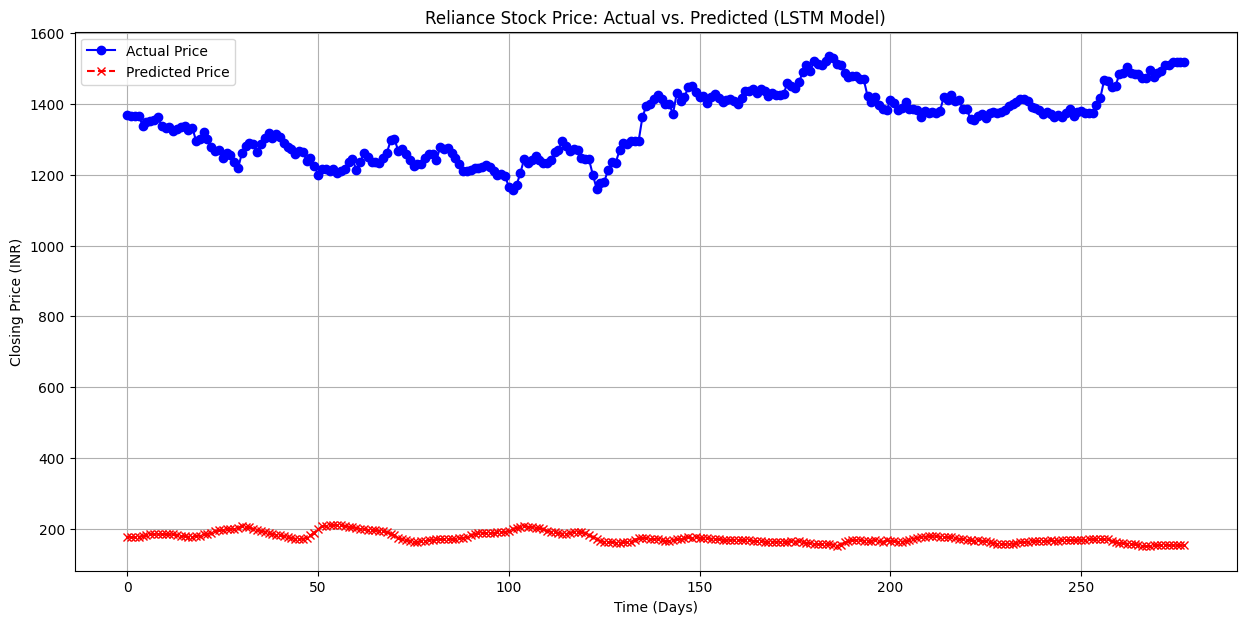

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.5686

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4618

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4126

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3697

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3351

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3080

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2859

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2673

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2512

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2373

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2252

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2144

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2048

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1922

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1813

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1748

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1689 - val_loss: 0.0015


Epoch 2/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0105

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0098

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0087

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0070 - val_loss: 0.0017


Epoch 3/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0042

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0060

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0057 - val_loss: 0.0017


Epoch 4/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0067

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051 - val_loss: 0.0014


Epoch 5/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0029

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0042

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0046

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0046

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0045 - val_loss: 0.0013


Epoch 6/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0032

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0047 - val_loss: 0.0016


Epoch 7/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0030

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0039 - val_loss: 0.0013


Epoch 8/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0051

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048 - val_loss: 0.0014


Epoch 9/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0041 - val_loss: 0.0013


Epoch 10/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0035

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - val_loss: 0.0018


Epoch 11/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - val_loss: 0.0039


Epoch 12/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0052

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 0.0018


Epoch 13/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035 - val_loss: 0.0018


Epoch 14/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0033

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 0.0013


Epoch 15/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0018


Epoch 16/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033 - val_loss: 0.0012


Epoch 17/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033 - val_loss: 0.0011


Epoch 18/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - val_loss: 9.6236e-04


Epoch 19/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 9.3091e-04


Epoch 20/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0027

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 9.7453e-04


Epoch 21/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0040

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 9.3609e-04


Epoch 22/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0018

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 9.4932e-04


Epoch 23/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0039

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0034 - val_loss: 0.0020


Epoch 24/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 8.0317e-04


Epoch 25/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 8.9298e-04


Epoch 26/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 7.0892e-04


Epoch 27/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 7.9631e-04


Epoch 28/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0014


Epoch 29/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0043

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 6.9119e-04


Epoch 30/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 6.5482e-04


Epoch 31/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0041

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0015


Epoch 32/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0047

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030 - val_loss: 6.5562e-04


Epoch 33/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0018

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 6.8734e-04


Epoch 34/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0013


Epoch 35/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0038

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 6.1851e-04


Epoch 36/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0028

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 0.0011


Epoch 37/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0045

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0026 - val_loss: 9.7545e-04


Epoch 38/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0018

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0026 - val_loss: 9.2507e-04


Epoch 39/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027 - val_loss: 0.0015


Epoch 40/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0026 - val_loss: 5.8254e-04


Epoch 41/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 6.7250e-04


Epoch 42/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0027

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - val_loss: 0.0019


Epoch 43/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0029

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 7.4126e-04


Epoch 44/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - val_loss: 8.2902e-04


Epoch 45/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 8.3838e-04


Epoch 46/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0034

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 8.3598e-04


Epoch 47/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0026

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 7.3431e-04


Epoch 48/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0019

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 5.6044e-04


Epoch 49/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0018

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 7.0873e-04


Epoch 50/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0035

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 5.6477e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

11/20/2025 02:43:49 PM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
